In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.job import job_monitor
provider = IBMQ.load_account()

/tmp/ipykernel_60/2779030276.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [3]:
# nビット量子回路に量子フーリエ変換を施す関数
def qft(qc, n):
    for i in range(n-1,0,-1):
        qc.h(i)
        for j in range(i-1,-1,-1):
            qc.cp(np.pi / (2 ** (i - j)), j, i)
        qc.barrier()
    qc.h(0)
    for i in range(0, n // 2):
        qc.swap(i, n-i-1)


# nビット量子回路に逆量子フーリエ変換を施す関数
def inverse_qft(qc, n):
    for i in range(n//2):
        qc.swap(i, n-i-1)
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(-np.pi / (2 ** (j - i)), j, i)
        qc.barrier()

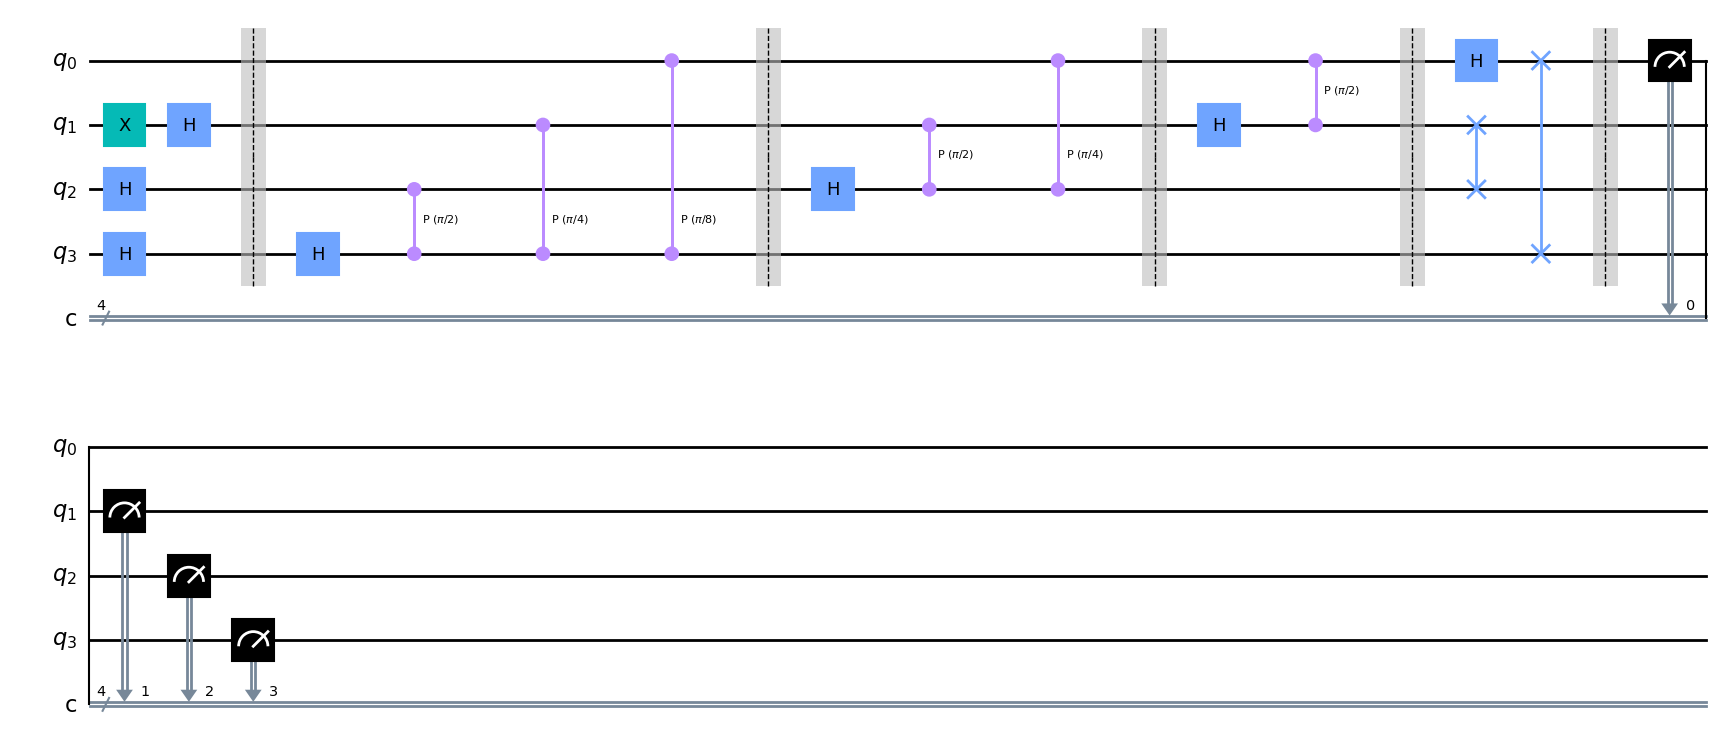

In [7]:
# 周期性のある状態を作る回路
circ_init = QuantumCircuit(4,4)

# 初期状態を構築

circ_init.x(1)
circ_init.h(1)
circ_init.h(2)
circ_init.h(3)




# 量子フーリエ変換を実装する回路

circ_qft = QuantumCircuit(4,4)
circ_qft.barrier()
qft(circ_qft, 4)
#inverse_qft(circ_qft, 4)

#測定
meas = QuantumCircuit(4,4)
meas.barrier()
meas.measure([0,1,2,3],[0,1,2,3])


qc = circ_init.compose(circ_qft).compose(meas)
qc.draw(output='mpl')

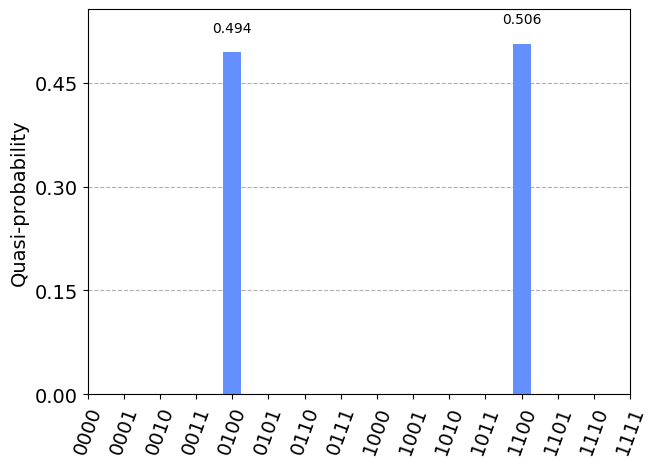

In [10]:
#シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')

shots = 2048

job_sim = execute(qc, backend=simulator, shots=shots)
counts = job_sim.result().get_counts(qc)

n0000=counts.get('0000',0)
n0001=counts.get('0001',0)
n0010=counts.get('0010',0)
n0011=counts.get('0011',0)
n0100=counts.get('0100',0)
n0101=counts.get('0101',0)
n0110=counts.get('0110',0)
n0111=counts.get('0111',0)
n1000=counts.get('1000',0)
n1001=counts.get('1001',0)
n1010=counts.get('1010',0)
n1011=counts.get('1011',0)
n1100=counts.get('1100',0)
n1101=counts.get('1101',0)
n1110=counts.get('1110',0)
n1111=counts.get('1111',0)
a0=list(counts.values())
ntotal=sum(a0)


#pict the results
plot_histogram({'0000':n0000/ntotal,'0001':n0001/ntotal,'0010':n0010/ntotal,'0011':n0011/ntotal, '0100':n0100/ntotal,'0101':n0101/ntotal,'0110':n0110/ntotal,'0111':n0111/ntotal, '1000':n1000/ntotal,'1001':n1001/ntotal,'1010':n1010/ntotal,'1011':n1011/ntotal, '1100':n1100/ntotal,'1101':n1101/ntotal,'1110':n1110/ntotal,'1111':n1111/ntotal})

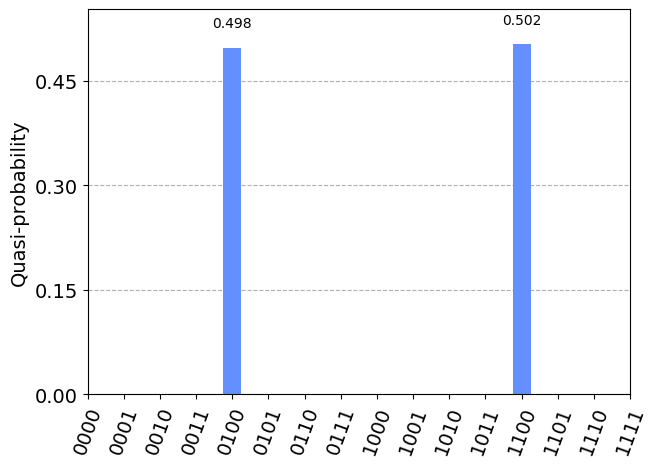

In [11]:
# シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')
shots = 2048

job_sim = execute(qc, backend=simulator, shots=shots)
result = job_sim.result()
counts = result.get_counts(qc)
total_counts = sum(counts.values())

# 辞書に含まれない状態を追加し、値を0にする
for state in [format(i, '04b') for i in range(16)]:
    if state not in counts:
        counts[state] = 0

# ヒストグラムを作成
normalized_counts = {state: count / total_counts for state, count in counts.items()}
plot_histogram(normalized_counts)